In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

Load The Training Data And Test Data

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/train.csv')

 Combine train and test datasets for cleaning

In [ ]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)

 Remove rows with missing values

In [ ]:
combined_data.dropna(subset=['Age', 'Fare'], inplace=True)

Remove Outliers using z-score

In [ ]:
z_scores = np.abs(zscore(combined_data[['Age', 'Fare']]))
combined_data = combined_data[(z_scores < 3).all(axis=1)]

Split data back into train and test data

In [ ]:
cleaned_train_data = combined_data.iloc[:len(train_data)]
cleaned_test_data = combined_data.iloc[len(train_data):]

Display the shape of cleaned dataset

In [ ]:
print("Cleaned Train Data Shape:", cleaned_train_data.shape)
print("Cleaned Test Data Shape:", cleaned_test_data.shape)

Cleaned Train Data Shape: (891, 12)
Cleaned Test Data Shape: (497, 12)


Checking for missing Value

In [ ]:
cleaned_train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,False,False,False,False,False,False,False,False,True,False
1135,False,False,False,False,False,False,False,False,False,False,True,False
1136,False,False,False,False,False,False,False,False,False,False,False,False
1137,False,False,False,False,False,False,False,False,False,False,True,False


Checking for null values,coloumn wise

In [ ]:
cleaned_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          684
Embarked         3
dtype: int64

Getting total no. of null values

In [ ]:
cleaned_train_data.isnull().sum().sum()

687

Remove Null Values

In [ ]:
cleaned_1 =cleaned_train_data.dropna()

In [ ]:
cleaned_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
1109,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
1115,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
1121,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S


Checking for null values

In [ ]:
cleaned_1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,False,False,False,False,False,False,False,False,False,False,False,False
1109,False,False,False,False,False,False,False,False,False,False,False,False
1115,False,False,False,False,False,False,False,False,False,False,False,False
1121,False,False,False,False,False,False,False,False,False,False,False,False


Checking total no of null values

In [ ]:
cleaned_1.isnull().sum().sum()

0

Display first few values

In [ ]:
cleaned_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Display last few values

In [ ]:
cleaned_1.tail

<bound method NDFrame.tail of       PassengerId  Survived  Pclass  \
1               2         1       1   
3               4         1       1   
6               7         0       1   
10             11         1       3   
11             12         1       1   
...           ...       ...     ...   
1106          216         1       1   
1109          219         1       1   
1115          225         1       1   
1121          231         1       1   
1136          246         0       1   

                                                   Name     Sex   Age  SibSp  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                               McCarthy, Mr. Timothy J    male  54.0      0   
10                      Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                             Bonnell, Miss. Elizabeth  female  58.0      0   
...                  

Remove Outliers

In [ ]:
cleaned_1
cleaned_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,390.308824,0.642157,1.230392,36.060882,0.421569,0.382353,58.513767
std,258.108824,0.480545,0.553411,15.809379,0.551510,0.651548,37.737273
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,175.000000,0.000000,1.000000,25.000000,0.000000,0.000000,27.428100
50%,339.000000,1.000000,1.000000,36.000000,0.000000,0.000000,53.100000
75%,594.000000,1.000000,1.000000,48.000000,1.000000,1.000000,79.650000
max,890.000000,1.000000,3.000000,71.000000,2.000000,2.000000,164.866700


<ipython-input-28-4c6fa149aa9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_1["Age"])


<Axes: xlabel='Age', ylabel='Density'>

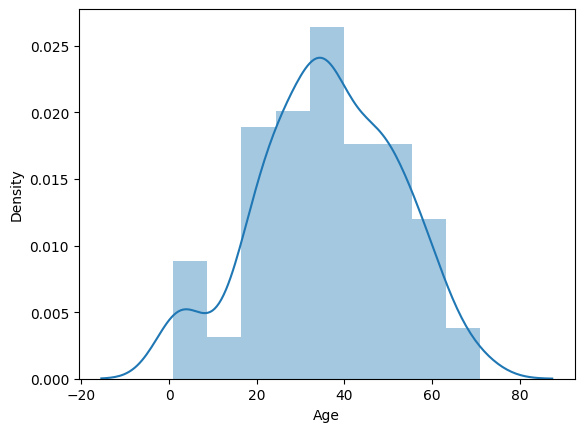

In [ ]:
sns.distplot(cleaned_1["Age"])

<Axes: >

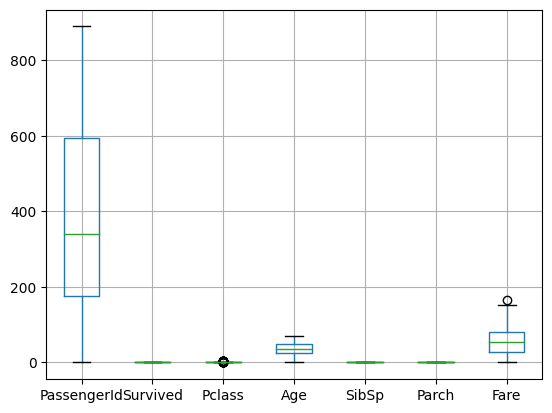

In [ ]:
cleaned_1.boxplot()

<Axes: xlabel='Sex', ylabel='Age'>

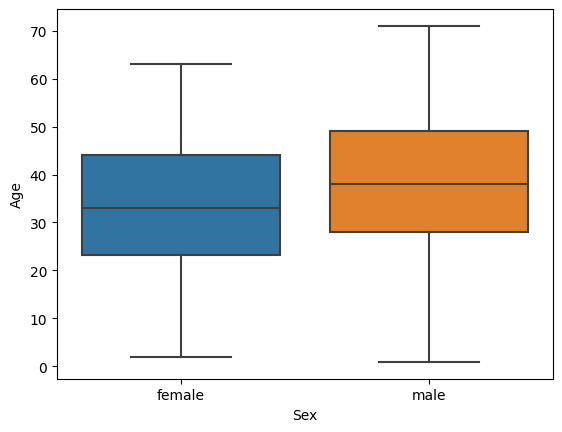

In [ ]:
sns.boxplot(x='Sex' , y='Age',data = cleaned_1)

Saved cleaned dataset to new CSV file

In [ ]:
cleaned_1.to_csv("cleaned data.csv",index = False)

In [ ]:
cleaned_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
1109,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
1115,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
1121,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
